<a href="https://colab.research.google.com/github/kjeyaram-orcl/DataScience/blob/main/Telecom_Churn_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom Churn Case Study

**Understanding Business and Problem Statement:**

You have a telecom firm which has collected data of all its customers.

The main types of attributes are:

1. Demographics (age, gender etc.)
2. Services availed (internet packs purchased, special offers taken etc.)
3. Expenses (amount of recharge done per month etc.)


Based on all this past information, you want to build a model which will predict whether a particular customer will churn or not.<br>
So the variable of interest, i.e. the target variable here is ‘Churn’ which will tell us whether or not a particular customer has churned. It is a binary variable - 1 means that the customer has churned and 0 means the customer has not churned.
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not.


In [95]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Understanding Data**

In [96]:
# Importing all datasets
churn_data = pd.read_csv('/content/churn_data.csv')
customer_data = pd.read_csv("/content/customer_data.csv")
internet_data = pd.read_csv("/content/internet_data.csv")


In [97]:
#Consolidate all data into one dataframe, Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')
# Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

In [98]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [99]:
# Let's check the dimensions of the dataframe
telecom.shape

(7043, 21)

In [100]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [101]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [102]:
#Checking Null values
telecom.isnull().sum()*100/telecom.shape[0]
# As you see, there are no NULL values in the dataset, hence it is clean.

customerID          0.0
tenure              0.0
PhoneService        0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
dtype: float64

**Data PreProcessing**

In [103]:
telecom['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [104]:
#Observed that there are some space in the 'TotalCharges' Feature which we replace with NaN. Also, convert the datatypes from Object to Numeric
telecom['TotalCharges'] = telecom['TotalCharges'].replace(' ', np.nan)
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'])
telecom['TotalCharges'].isnull().sum()

11

In [105]:
telecom['TotalCharges'].describe()


count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [106]:
# Total Charges will be related to Monthly Charges.
# We will impute Total charges multiplied by monthly charges & tenure
value = telecom['MonthlyCharges']*telecom['tenure']
telecom['TotalCharges'] = value.where(telecom['TotalCharges'].isnull(), other=telecom['TotalCharges'])
telecom['TotalCharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

#EXploratory Data Analytics - Univariate Analysis

(array([2701., 1227.,  685.,  503.,  460.,  414.,  396.,  311.,  224.,
         122.]),
 array([   0.  ,  868.48, 1736.96, 2605.44, 3473.92, 4342.4 , 5210.88,
        6079.36, 6947.84, 7816.32, 8684.8 ]),
 <BarContainer object of 10 artists>)

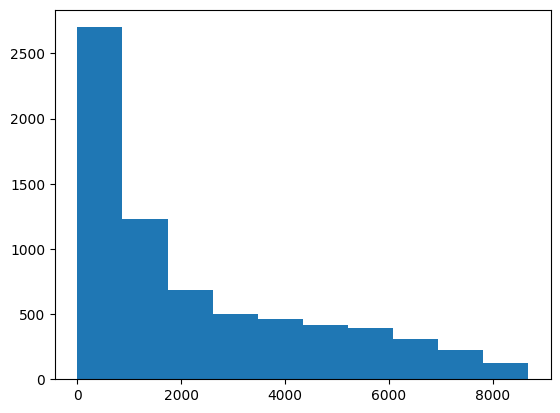

In [70]:
#Distribution of TotalCharges Feature
plt.hist(telecom['TotalCharges'])
# As you see here, most of the customers are in the range between 0 to 1000

###Churn

In [71]:
telecom.Churn.describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

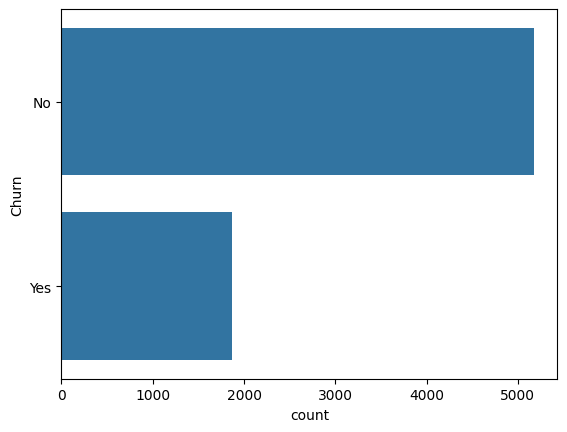

In [78]:
plt1 = sns.countplot(telecom['Churn'])

#As you see here, Churn['Yes'] rate is low which indicates data is unbalanced

###Tenure

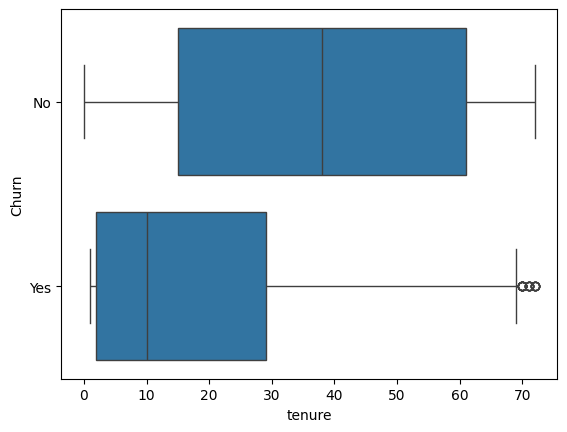

In [83]:
# The time for which a customer has been using the service.

sns.boxplot(x = 'tenure', y = 'Churn', data = telecom)
plt.show()

# As you see here, Customer with long tenure tends to less churn.

### Phone Service

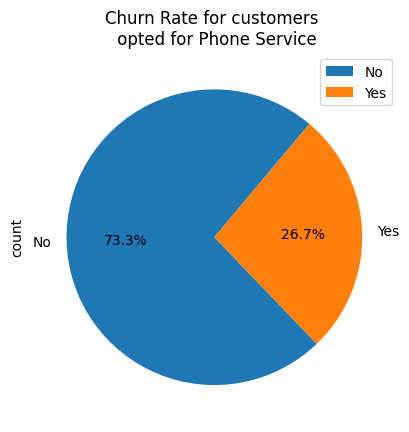

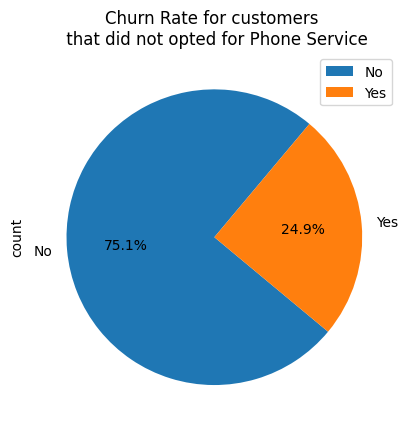

In [12]:
# Check Whether a customer has a landline phone service along with the internet service causes churn.

pie_PhoneService_Yes = pd.DataFrame(telecom[telecom['PhoneService'] == "Yes"]['Churn'].value_counts())
pie_PhoneService_Yes.plot.pie(subplots=True, labels = pie_PhoneService_Yes.index.values, autopct='%1.1f%%', startangle= 50 )
plt.title('Churn Rate for customers \n opted for Phone Service')
#plt.gca().set_aspect('equal')

pie_PhoneService_No = pd.DataFrame(telecom[telecom['PhoneService'] == "No"]['Churn'].value_counts())
pie_PhoneService_No.plot.pie(subplots=True, labels = pie_PhoneService_Yes.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Churn Rate for customers \n that did not opted for Phone Service')
plt.gca().set_aspect('equal')

plt.show()

# As you see here, Opting for phone service does not have a significant impact on churn rate.

### Contract

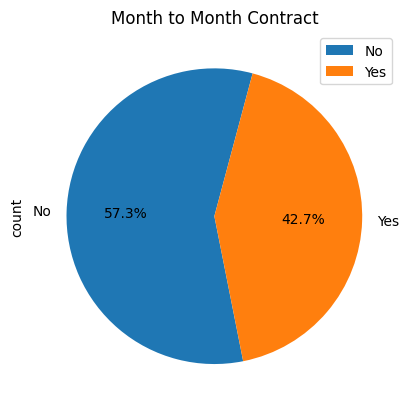

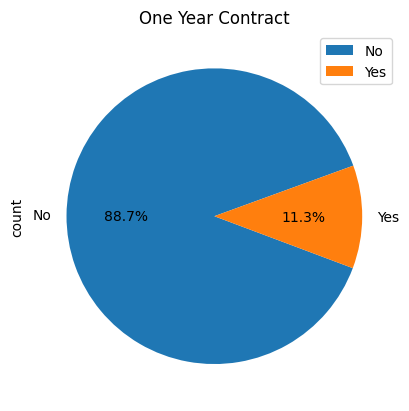

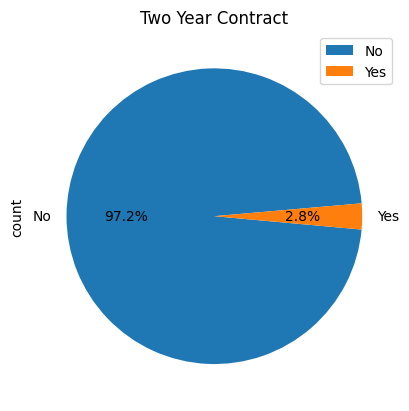

In [13]:
#Check Whether a customer contract causes churn.

pie_Contract_m2m = pd.DataFrame(telecom[telecom['Contract'] == "Month-to-month"]['Churn'].value_counts())
pie_Contract_m2m.plot.pie(subplots=True, labels = pie_Contract_m2m.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Month to Month Contract')
plt.gca().set_aspect('equal')

pie_Contract_1y = pd.DataFrame(telecom[telecom['Contract'] == "One year"]['Churn'].value_counts())
pie_Contract_1y.plot.pie(subplots=True, labels = pie_Contract_1y.index.values, autopct='%1.1f%%', startangle= 20)
plt.title('One Year Contract')
plt.gca().set_aspect('equal')

pie_Contract_2y = pd.DataFrame(telecom[telecom['Contract'] == "Two year"]['Churn'].value_counts())
pie_Contract_2y.plot.pie(subplots=True, labels = pie_Contract_2y.index.values, autopct='%1.1f%%', startangle= 5)
plt.title('Two Year Contract')
plt.gca().set_aspect('equal')

plt.show()

## As you see here, Customers with yearly contract tends to Churn a lot lesser than monthly contract.

### Paperless Billing

<Figure size 1500x1000 with 0 Axes>

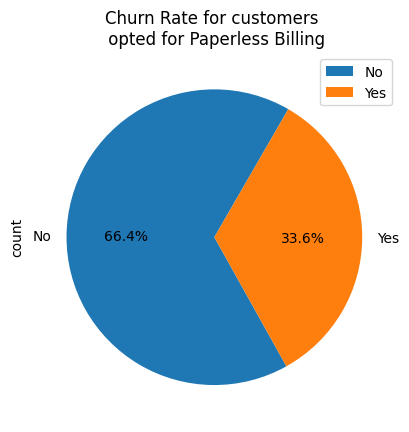

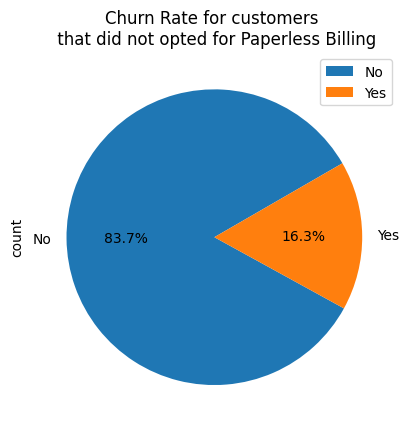

In [22]:
#Check Whether a customer who opted for paperless billing causes churn.

plt.figure(figsize=(15,10))
pie_PaperlessBilling_Yes = pd.DataFrame(telecom[telecom['PaperlessBilling'] == "Yes"]['Churn'].value_counts())
pie_PaperlessBilling_Yes.plot.pie(subplots=True, labels = pie_PaperlessBilling_Yes.index.values, autopct='%1.1f%%', startangle= 60)
plt.title('Churn Rate for customers \n opted for Paperless Billing')
plt.gca().set_aspect('equal')


pie_PaperlessBilling_No = pd.DataFrame(telecom[telecom['PaperlessBilling'] == "No"]['Churn'].value_counts())
pie_PaperlessBilling_No.plot.pie(subplots=True, labels = pie_PaperlessBilling_No.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Churn Rate for customers \n that did not opted for Paperless Billing')
plt.gca().set_aspect('equal')

plt.show()

# Churn Rate is higher for the customers who opted for paperless billing.

### Payment Method

<Figure size 1500x1000 with 0 Axes>

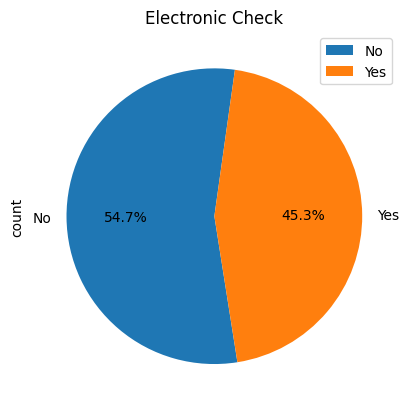

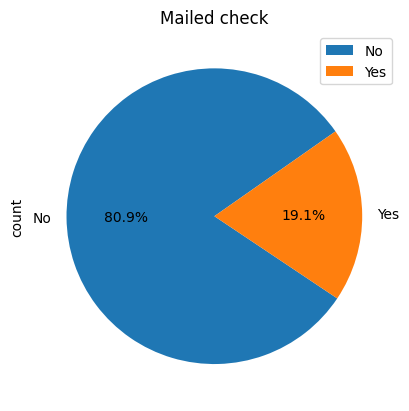

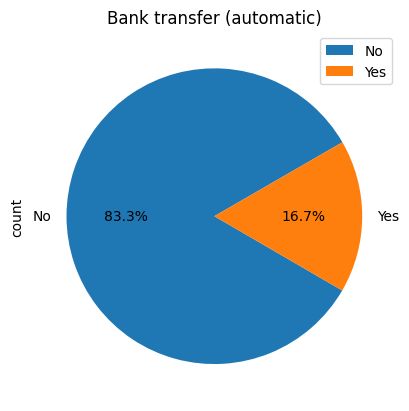

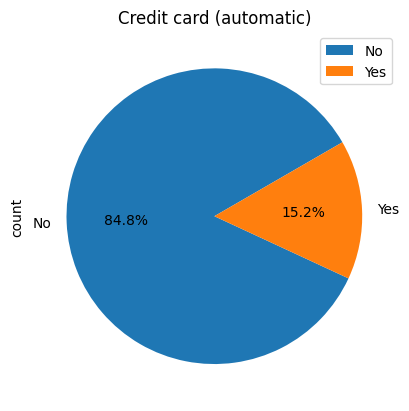

In [23]:
# Check Whether payment method causes churn.
plt.figure(figsize=(15,10))
pie_PaymentMethod_ec = pd.DataFrame(telecom[telecom['PaymentMethod'] == "Electronic check"]['Churn'].value_counts())
pie_PaymentMethod_ec.plot.pie(subplots=True, labels = pie_PaymentMethod_ec.index.values, autopct='%1.1f%%', startangle= 82)
plt.title('Electronic Check')
plt.gca().set_aspect('equal')

pie_PaymentMethod_mc = pd.DataFrame(telecom[telecom['PaymentMethod'] == "Mailed check"]['Churn'].value_counts())
pie_PaymentMethod_mc.plot.pie(subplots=True, labels = pie_PaymentMethod_mc.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('Mailed check')
plt.gca().set_aspect('equal')

pie_PaymentMethod_bta = pd.DataFrame(telecom[telecom['PaymentMethod'] == "Bank transfer (automatic)"]['Churn'].value_counts())
pie_PaymentMethod_bta.plot.pie(subplots=True, labels = pie_PaymentMethod_bta.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Bank transfer (automatic)')
plt.gca().set_aspect('equal')

pie_PaymentMethod_cca = pd.DataFrame(telecom[telecom['PaymentMethod'] == "Credit card (automatic)"]['Churn'].value_counts())
pie_PaymentMethod_cca.plot.pie(subplots=True, labels = pie_PaymentMethod_cca.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Credit card (automatic)')
plt.gca().set_aspect('equal')

plt.show()

# Customers with Electronic Check tends to churn more than other payment methods.

### Monthly Charges

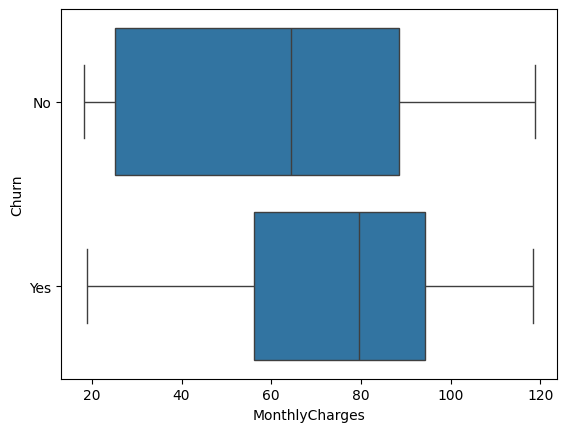

In [25]:
sns.boxplot(x = 'MonthlyCharges', y = 'Churn', data = telecom)
plt.show()

# Monthly charges are higher for customers who have churned.

### TotalCharges

ValueError: List of boxplot statistics and `positions` values must have same the length

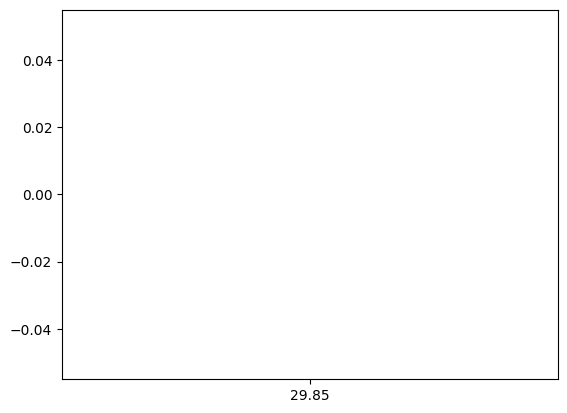

In [31]:
sns.boxplot(x = 'TotalCharges', y = 'Churn', data = telecom)
plt.show()

In [ ]:
# Median Total charges are low for customers who have churned.

### Gender

<Figure size 1500x500 with 0 Axes>

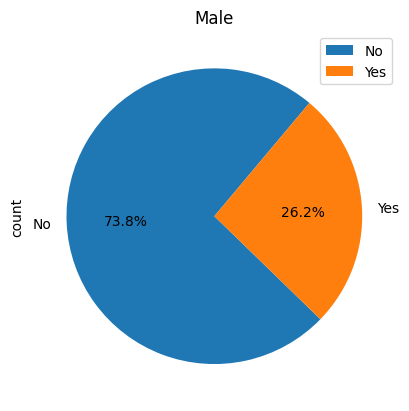

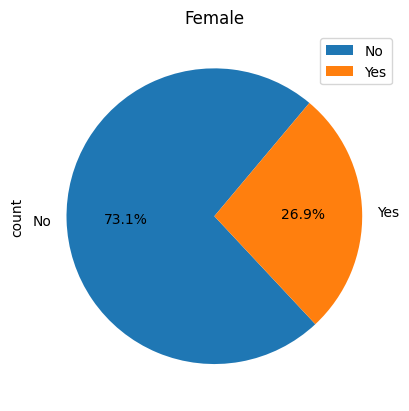

In [27]:
plt.figure(figsize=(15,5))
pie_Gender_M = pd.DataFrame(telecom[telecom['gender'] == "Male"]['Churn'].value_counts())
pie_Gender_M.plot.pie(subplots = True, labels = pie_Gender_M.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Male')
plt.gca().set_aspect('equal')

pie_Gender_F = pd.DataFrame(telecom[telecom['gender'] == "Female"]['Churn'].value_counts())
pie_Gender_F.plot.pie(subplots = True,  labels = pie_Gender_F.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Female')

plt.gca().set_aspect('equal')
plt.show()

In [ ]:
# There is no effect of Gender on Churn.

#### Senior Citizen

In [ ]:
plt.figure(figsize=(15,5))
pie_SeniorCitizen_Y = pd.DataFrame(telecom[telecom['SeniorCitizen'] == 1]['Churn'].value_counts())
pie_SeniorCitizen_Y.plot.pie(subplots = True, labels = pie_SeniorCitizen_Y.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Senior Citizen')
plt.gca().set_aspect('equal')

pie_SeniorCitizen_N = pd.DataFrame(telecom[telecom['SeniorCitizen'] == 0]['Churn'].value_counts())
pie_SeniorCitizen_N.plot.pie(subplots = True, labels = pie_SeniorCitizen_N.index.values, autopct='%1.1f%%', startangle= 45)
plt.title('Non Senior Citizen')

plt.gca().set_aspect('equal')
plt.show()

In [ ]:
# Senior Citizens tends to churn more.

#### Partner

In [ ]:
plt.figure(figsize=(15,5))
pie_Partner_Y = pd.DataFrame(telecom[telecom['Partner'] == 'Yes']['Churn'].value_counts())
pie_Partner_Y.plot.pie(subplots = True,  labels = pie_Partner_Y.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('Married / Live in')
plt.gca().set_aspect('equal')

pie_Partner_N = pd.DataFrame(telecom[telecom['Partner'] == 'No']['Churn'].value_counts())
pie_Partner_N.plot.pie(subplots = True,  labels = pie_Partner_N.index.values, autopct='%1.1f%%', startangle= 60)
plt.title('Single')

plt.gca().set_aspect('equal')
plt.show()

#### Dependents

In [ ]:
plt.figure(figsize=(15,5))
pie_Dependents_Y = pd.DataFrame(telecom[telecom['Dependents'] == 'Yes']['Churn'].value_counts())
pie_Dependents_Y.plot.pie(subplots = True,  labels = pie_Dependents_Y.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('Has Dependents')
plt.gca().set_aspect('equal')

pie_Dependents_N = pd.DataFrame(telecom[telecom['Dependents'] == 'No']['Churn'].value_counts())
pie_Dependents_N.plot.pie(subplots = True,  labels = pie_Dependents_N.index.values, autopct='%1.1f%%', startangle= 60)
plt.title('No Dependents')

plt.gca().set_aspect('equal')
plt.show()

In [ ]:
# Customers with no dependents tends to churn more.

#### Multiple Lines

In [ ]:
# Whether a customer has multiple lines of internet connectivity.

In [ ]:
plt.figure(figsize=(15,5))
pie_MultipleLines_Y = pd.DataFrame(telecom[telecom['MultipleLines'] == 'Yes']['Churn'].value_counts())
pie_MultipleLines_Y.plot.pie(subplots = True,  labels = pie_MultipleLines_Y.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Multiple lines of internet connectivity')
plt.gca().set_aspect('equal')

pie_MultipleLines_N = pd.DataFrame(telecom[telecom['MultipleLines'] == 'No']['Churn'].value_counts())
pie_MultipleLines_N.plot.pie(subplots = True,  labels = pie_MultipleLines_N.index.values, autopct='%1.1f%%', startangle= 45)
plt.title('Single line of internet connectivity')

plt.gca().set_aspect('equal')
plt.show()

In [ ]:
# Multiple lines of internet connectivity doesn't effect churn that much.

#### Internet Service

In [ ]:
plt.figure(figsize=(15,5))
pie_InternetService_fo = pd.DataFrame(telecom[telecom['InternetService'] == "Fiber optic"]['Churn'].value_counts())
pie_InternetService_fo.plot.pie(subplots = True, labels = pie_InternetService_fo.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Fiber Optic')
plt.gca().set_aspect('equal')

pie_InternetService_dsl = pd.DataFrame(telecom[telecom['InternetService'] == "DSL"]['Churn'].value_counts())
pie_InternetService_dsl.plot.pie(subplots = True, labels = pie_InternetService_dsl.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('DSL')
plt.gca().set_aspect('equal')

pie_InternetService_no = pd.DataFrame(telecom[telecom['InternetService'] == "No"]['Churn'].value_counts())
pie_InternetService_no.plot.pie(subplots = True, labels = pie_InternetService_no.index.values, autopct='%1.1f%%', startangle= 13)
plt.title('No Internet Service')
plt.gca().set_aspect('equal')

plt.show()

In [ ]:
# Customers with Fiber Optic Connection churn the most whereas least probability of churning for those with no internet service.

#### Online Security

In [ ]:
plt.figure(figsize=(15,5))
pie_OnlineSecurity_Y = pd.DataFrame(telecom[telecom['OnlineSecurity'] == 'Yes']['Churn'].value_counts())
pie_OnlineSecurity_Y.plot.pie(subplots = True,  labels = pie_OnlineSecurity_Y.index.values, autopct='%1.1f%%', startangle= 25)
plt.title('Online Security')
plt.gca().set_aspect('equal')

pie_OnlineSecurity_N = pd.DataFrame(telecom[telecom['OnlineSecurity'] == 'No']['Churn'].value_counts())
pie_OnlineSecurity_N.plot.pie(subplots = True, labels = pie_OnlineSecurity_N.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Not opted for Online Security')
plt.gca().set_aspect('equal')
plt.show()

In [ ]:
# Customers opted for Online Security churn less than who have not opted.

#### Online Backup

In [ ]:
plt.figure(figsize=(15,5))
pie_OnlineBackup_Y = pd.DataFrame(telecom[telecom['OnlineBackup'] == 'Yes']['Churn'].value_counts())
pie_OnlineBackup_Y.plot.pie(subplots = True,  labels = pie_OnlineBackup_Y.index.values, autopct='%1.1f%%', startangle= 40)
plt.title('Online Backup')
plt.gca().set_aspect('equal')

pie_OnlineBackup_N = pd.DataFrame(telecom[telecom['OnlineBackup'] == 'No']['Churn'].value_counts())
pie_OnlineBackup_N.plot.pie(subplots = True, labels = pie_OnlineBackup_N.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Not opted for Online Backup')
plt.gca().set_aspect('equal')

plt.show()

In [ ]:
# Customers opted for Online Backup churn less than who have not opted.

#### Device Protection

In [ ]:
plt.figure(figsize=(15,5))

pie_DeviceProtection_Y = pd.DataFrame(telecom[telecom['DeviceProtection'] == 'Yes']['Churn'].value_counts())
pie_DeviceProtection_Y.plot.pie(subplots = True, labels = pie_DeviceProtection_Y.index.values, autopct='%1.1f%%', startangle= 40)
plt.title('Online Backup')
plt.gca().set_aspect('equal')

pie_DeviceProtection_N = pd.DataFrame(telecom[telecom['DeviceProtection'] == 'No']['Churn'].value_counts())
pie_DeviceProtection_N.plot.pie(subplots = True, labels = pie_DeviceProtection_N.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Not opted for Online Backup')
plt.gca().set_aspect('equal')
plt.show()

In [ ]:
# Customers opted for Device Potection churn less than who have not opted.

#### Tech Support

In [ ]:
plt.figure(figsize=(15,5))
pie_TechSupport_Y = pd.DataFrame(telecom[telecom['TechSupport'] == 'Yes']['Churn'].value_counts())
pie_TechSupport_Y.plot.pie(subplots = True,labels = pie_TechSupport_Y.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Tech Support')
plt.gca().set_aspect('equal')

pie_TechSupport_N = pd.DataFrame(telecom[telecom['TechSupport'] == 'No']['Churn'].value_counts())
pie_TechSupport_N.plot.pie(subplots = True, labels = pie_TechSupport_N.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Not opted for Tech Support')

plt.gca().set_aspect('equal')
plt.show()

In [ ]:
# Customers opted for Tech Support churn less than who have not opted.

#### Streaming TV

In [ ]:
plt.figure(figsize=(15,5))
pie_StreamingTV_Y = pd.DataFrame(telecom[telecom['StreamingTV'] == 'Yes']['Churn'].value_counts())
pie_StreamingTV_Y.plot.pie(subplots = True, labels = pie_StreamingTV_Y.index.values, autopct='%1.1f%%', startangle= 55)
plt.title('Streaming TV')
plt.gca().set_aspect('equal')

pie_StreamingTV_N = pd.DataFrame(telecom[telecom['StreamingTV'] == 'No']['Churn'].value_counts())
pie_StreamingTV_N.plot.pie(subplots = True,labels = pie_StreamingTV_N.index.values, autopct='%1.1f%%', startangle= 58)
plt.title('Not opted for Streaming TV')
plt.gca().set_aspect('equal')

plt.show()

In [ ]:
# Streaming TV doesn't make such impact on churning.

#### Streaming Movies

In [ ]:
plt.figure(figsize=(15,5))
pie_StreamingMovies_Y = pd.DataFrame(telecom[telecom['StreamingMovies'] == 'Yes']['Churn'].value_counts())
pie_StreamingMovies_Y.plot.pie(subplots = True, labels = pie_StreamingMovies_Y.index.values, autopct='%1.1f%%', startangle= 55)
plt.title('Streaming Movies')
plt.gca().set_aspect('equal')

pie_StreamingMovies_N = pd.DataFrame(telecom[telecom['StreamingMovies'] == 'No']['Churn'].value_counts())
pie_StreamingMovies_N.plot.pie(subplots = True, labels = pie_StreamingMovies_N.index.values, autopct='%1.1f%%', startangle= 60)
plt.title('Not opted for Streaming TV')
plt.gca().set_aspect('equal')

plt.show()

In [ ]:
# Streaming Movies doesn't make such impact on churning.

# Model Building

## Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [107]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
telecom[varlist] = telecom[varlist].apply(binary_map)
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [108]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom[['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,False,True,False,False,False,False,False,False,False,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,...,False,False,False,True,False,False,False,False,False,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,False,True,False,False,False,False,False,False,False,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,False,False,False,True,False,True,False,False,False,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,False,False,False,False,False,False,False,False,False,False


#### Dropping the repeated variables

In [109]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(columns =['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'])
telecom.info()

# Now you can see that you have all variables as numeric.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   bool   
 11  Cont

#### Checking for Outliers

In [110]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [111]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

#From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147,2279.734304
std,24.559481,30.090047,0.368612,2266.794470
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.500000,0.000000,398.550000
50%,29.000000,70.350000,0.000000,1394.550000
75%,55.000000,89.850000,0.000000,3786.600000
90%,69.000000,102.600000,1.000000,5973.690000
95%,72.000000,107.400000,1.000000,6921.025000
99%,72.000000,114.729000,1.000000,8039.256000


#### Checking for Missing Values

In [112]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBacku

In [113]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
MultipleLines_No phone service           0.0
MultipleLines_Yes                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
OnlineSecurity_No internet service       0.0
OnlineSecurity_Yes                       0.0
OnlineBack

###Test-Train Split of Input Dataset

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
# Putting feature variable to X
X = telecom.drop(['Churn','customerID'], axis=1)
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,False,False,...,False,True,False,False,False,False,False,False,False,False
1,34,1,0,56.95,1889.50,0,0,0,True,False,...,False,False,False,True,False,False,False,False,False,False
2,2,1,1,53.85,108.15,0,0,0,False,False,...,False,True,False,False,False,False,False,False,False,False
3,45,0,0,42.30,1840.75,0,0,0,True,False,...,False,False,False,True,False,True,False,False,False,False
4,2,1,1,70.70,151.65,0,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [116]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   int64  
 1   PhoneService                           7043 non-null   int64  
 2   PaperlessBilling                       7043 non-null   int64  
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7043 non-null   float64
 5   SeniorCitizen                          7043 non-null   int64  
 6   Partner                                7043 non-null   int64  
 7   Dependents                             7043 non-null   int64  
 8   Contract_One year                      7043 non-null   bool   
 9   Contract_Two year                      7043 non-null   bool   
 10  PaymentMethod_Credit card (automatic)  7043 non-null   bool   
 11  Paym

In [117]:
# Putting response variable to y
y = telecom['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [118]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

###Feature Scaling

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
# Scales of predictor is not uniform then gradient descent will suffer so we need to have uniform scale of all predictor variables
scaler = StandardScaler()
X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
877,0.754422,0,0,-0.145568,0.350963,0,0,1,True,False,...,False,False,False,True,False,True,False,True,False,True
5792,-0.710751,1,1,1.051796,-0.377957,1,0,0,False,False,...,False,False,False,True,False,True,False,False,False,True
5334,0.673024,1,1,1.437668,1.329866,0,1,1,False,True,...,False,True,False,True,False,True,False,True,False,True
878,1.120716,1,0,0.006794,0.776103,0,0,0,True,False,...,False,False,False,True,False,True,False,False,False,False
6578,-0.914247,1,0,0.298268,-0.701925,0,0,1,True,False,...,False,False,False,True,False,True,False,False,False,True


###Finding Correlations amoung Features

In [146]:
# Let's see the correlation matrix
cor= telecom.corr(numeric_only=True)
cor

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
tenure,1.000000,0.008448,0.006152,0.247900,0.826178,-0.352229,0.016567,0.379697,0.159712,0.202570,...,-0.039062,0.360277,-0.039062,0.360653,-0.039062,0.324221,-0.039062,0.279756,-0.039062,0.286111
PhoneService,0.008448,1.000000,0.016505,0.247398,0.113214,0.011942,0.008576,0.017706,-0.001762,-0.002791,...,0.172209,-0.052312,0.172209,-0.071227,0.172209,-0.096340,0.172209,-0.022574,0.172209,-0.032959
PaperlessBilling,0.006152,0.016505,1.000000,0.352150,0.158574,0.191825,0.156530,-0.014877,-0.111377,-0.051391,...,-0.321013,0.126735,-0.321013,0.103797,-0.321013,0.037880,-0.321013,0.223841,-0.321013,0.211716
MonthlyCharges,0.247900,0.247398,0.352150,1.000000,0.651174,0.193356,0.220173,0.096848,-0.113890,0.004904,...,-0.763557,0.441780,-0.763557,0.482692,-0.763557,0.338304,-0.763557,0.629603,-0.763557,0.627429
TotalCharges,0.826178,0.113214,0.158574,0.651174,1.000000,-0.198324,0.103006,0.317504,0.062078,0.170814,...,-0.375223,0.509226,-0.375223,0.521983,-0.375223,0.431883,-0.375223,0.514973,-0.375223,0.520122
Churn,-0.352229,0.011942,0.191825,0.193356,-0.198324,1.000000,0.150889,-0.150448,-0.164221,-0.177820,...,-0.227890,-0.082255,-0.227890,-0.066160,-0.227890,-0.164674,-0.227890,0.063228,-0.227890,0.061382
SeniorCitizen,0.016567,0.008576,0.156530,0.220173,0.103006,0.150889,1.000000,0.016479,-0.211185,-0.046262,...,-0.182742,0.066572,-0.182742,0.059428,-0.182742,-0.060625,-0.182742,0.105378,-0.182742,0.120176
Partner,0.379697,0.017706,-0.014877,0.096848,0.317504,-0.150448,0.016479,1.000000,0.452676,0.082783,...,0.000615,0.141498,0.000615,0.153786,0.000615,0.119999,0.000615,0.124666,0.000615,0.117412
Dependents,0.159712,-0.001762,-0.111377,-0.113890,0.062078,-0.164221,-0.211185,0.452676,1.000000,0.068368,...,0.139812,0.023671,0.139812,0.013963,0.139812,0.063268,0.139812,-0.016558,0.139812,-0.039741
Contract_One year,0.202570,-0.002791,-0.051391,0.004904,0.170814,-0.177820,-0.046262,0.082783,0.068368,1.000000,...,0.038004,0.083722,0.038004,0.102495,0.038004,0.095775,0.038004,0.061612,0.038004,0.064926


In [157]:
#get all the highly correlated features
cs=set()
for i in range(len(cor.columns)):
	for j in range(i):
		if(abs(cor.iloc[i,j])>0.7):
			col1=cor.columns[i]
			col2=cor.columns[j]
			print(abs(cor.iloc[i,j]), "___", i ,"___", j ,  "___", col1, "___", col2)
			cs.add(col1)
			cs.add(col2)

print(cs)

0.8261783979502434 ___ 4 ___ 0 ___ TotalCharges ___ tenure
1.0 ___ 15 ___ 1 ___ MultipleLines_No phone service ___ PhoneService
0.7870655284726781 ___ 17 ___ 3 ___ InternetService_Fiber optic ___ MonthlyCharges
0.763556558286573 ___ 18 ___ 3 ___ InternetService_No ___ MonthlyCharges
0.763556558286573 ___ 19 ___ 3 ___ OnlineSecurity_No internet service ___ MonthlyCharges
1.0 ___ 19 ___ 18 ___ OnlineSecurity_No internet service ___ InternetService_No
0.763556558286573 ___ 21 ___ 3 ___ OnlineBackup_No internet service ___ MonthlyCharges
1.0 ___ 21 ___ 18 ___ OnlineBackup_No internet service ___ InternetService_No
1.0 ___ 21 ___ 19 ___ OnlineBackup_No internet service ___ OnlineSecurity_No internet service
0.763556558286573 ___ 23 ___ 3 ___ DeviceProtection_No internet service ___ MonthlyCharges
1.0 ___ 23 ___ 18 ___ DeviceProtection_No internet service ___ InternetService_No
1.0 ___ 23 ___ 19 ___ DeviceProtection_No internet service ___ OnlineSecurity_No internet service
1.0 ___ 23 ___ 21

#### Dropping highly correlated dummy variables

In [158]:
X_test = X_test.drop(['InternetService_No', 'StreamingMovies_No internet service', 'InternetService_Fiber optic', 'TotalCharges', 'MultipleLines_No phone service', 'OnlineBackup_No internet service', 'TechSupport_No internet service', 'PhoneService', 'StreamingTV_No internet service', 'tenure', 'MonthlyCharges', 'DeviceProtection_No internet service', 'OnlineSecurity_No internet service'], axis=1)
X_train = X_train.drop(['InternetService_No', 'StreamingMovies_No internet service', 'InternetService_Fiber optic', 'TotalCharges', 'MultipleLines_No phone service', 'OnlineBackup_No internet service', 'TechSupport_No internet service', 'PhoneService', 'StreamingTV_No internet service', 'tenure', 'MonthlyCharges', 'DeviceProtection_No internet service', 'OnlineSecurity_No internet service'], axis=1)

#### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

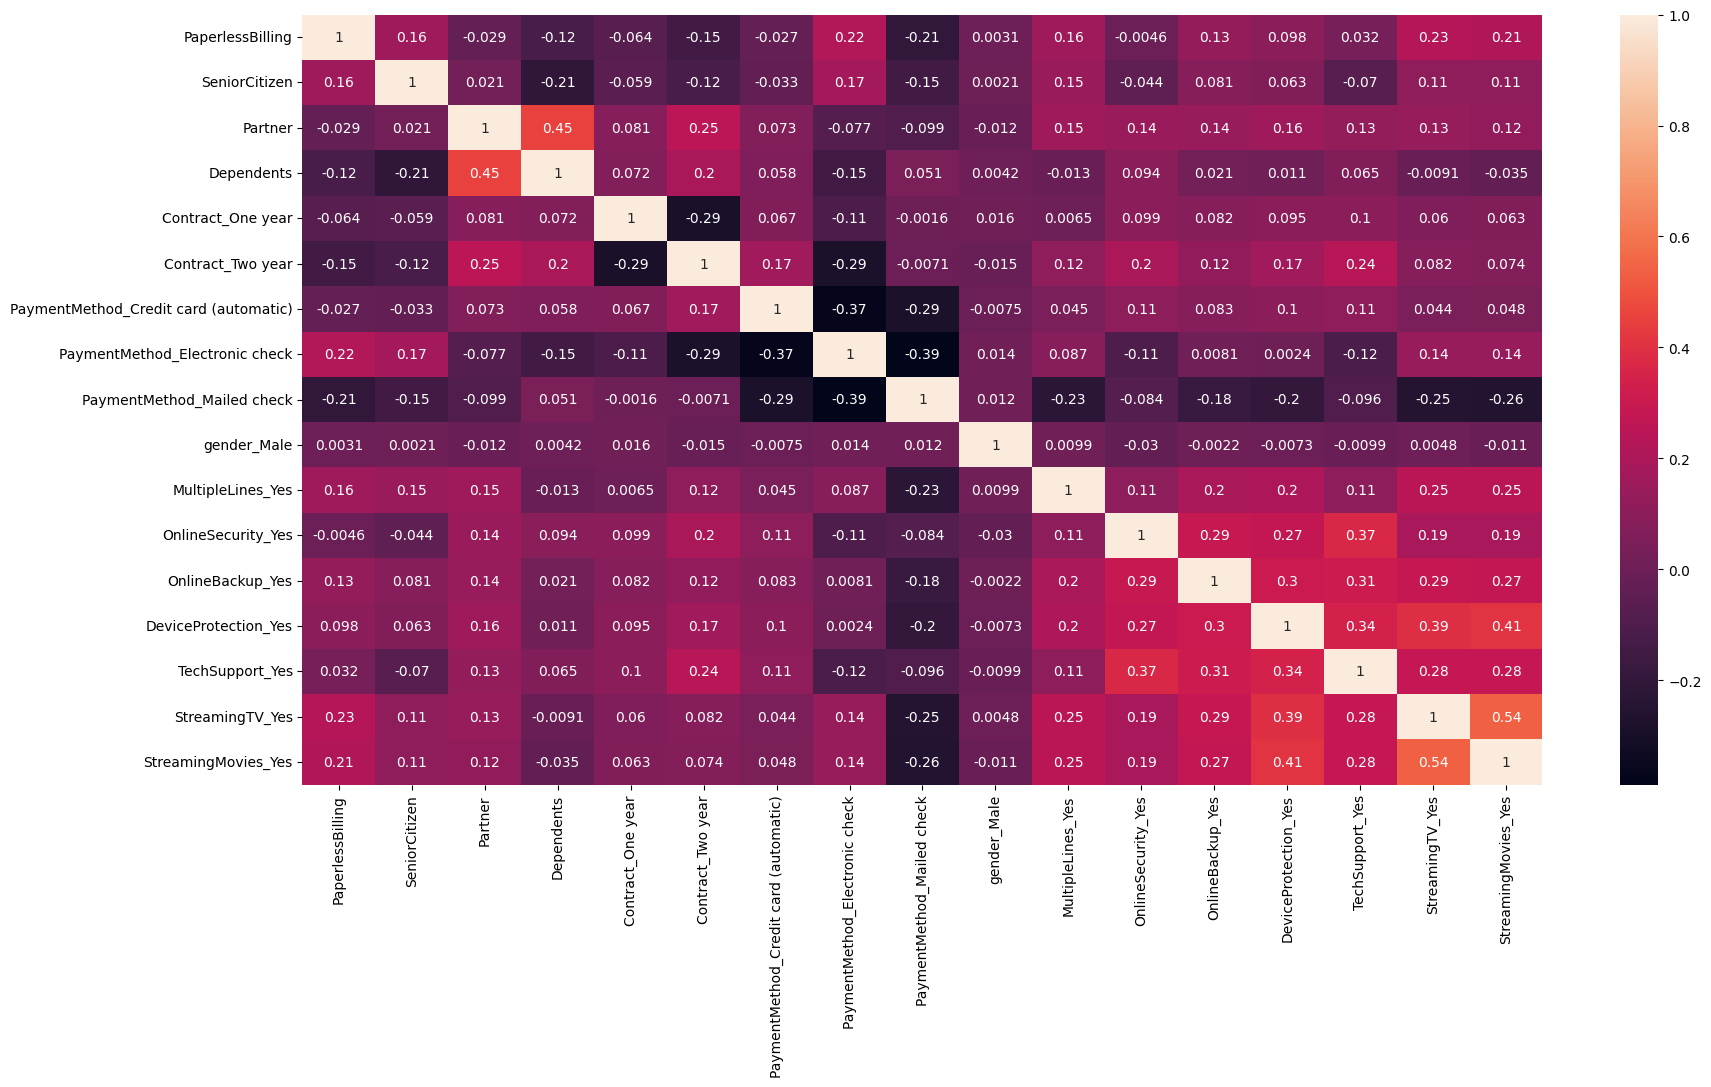

In [161]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [168]:
from statsmodels.tools import add_constant as add_constant

In [169]:
# Logistic regression model
#logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
#logm1.fit().summary()

X_train_constant=add_constant(X_train)
X_train_constant.head()


,const,PaperlessBilling,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
877,1.0,0,0,0,1,True,False,False,False,False,False,False,True,False,True,True,True,True
5792,1.0,1,1,0,0,False,False,False,False,True,False,False,True,False,True,True,False,True
5334,1.0,1,0,1,1,False,True,False,False,False,False,True,False,True,True,True,True,True
878,1.0,0,0,0,0,True,False,False,True,False,False,True,True,False,True,True,False,False
6578,1.0,0,0,0,1,True,False,True,False,False,False,True,True,False,True,True,False,True


In [172]:
import statsmodels.api as smd
cols=X_train_constant.columns

model=smd.Logit(y_train.astype(float),X_train_constant[cols].astype(float))
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.440157
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                          Logit   Df Residuals:                     4912
Method:                           MLE   Df Model:                           17
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.2378
Time:                        10:06:33   Log-Likelihood:                -2170.0
converged:                       True   LL-Null:                       -2847.1
Covariance Type:            nonrobust   LLR p-value:                1.026e-277
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.8935      0.129     -6.929      0.000      -1.146      -0.641
PaperlessBilling                          0.5089      0.085      5.981      0.000       0.342       0.676
SeniorCitizen                             0.3284      0.097      3.369      0.001       0.137       0.519
Partner                                  -0.1716      0.088     -1.942      0.052      -0.345       0.002
Dependents                               -0.2727      0.103     -2.646      0.008      -0.475      -0.071
Contract_One year                        -1.4911      0.116    -12.904      0.000      -1.718      -1.265
Contract_Two year                        -2.6697      0.185    -14.423      0.000      -3.033      -2.307
PaymentMethod_Credit card (automatic)    -0.1443      0.133     -1.088      0.276      -0.404       0.116
PaymentMethod_Electronic check            0.5700      0.109      5.251      0.000       0.357       0.783
PaymentMethod_Mailed check               -0.0585      0.129     -0.454      0.650      -0.311       0.194
gender_Male                              -0.0642      0.075     -0.858      0.391      -0.211       0.082
MultipleLines_Yes                         0.2683      0.082      3.281      0.001       0.108       0.428
OnlineSecurity_Yes                       -0.3126      0.097     -3.214      0.001      -0.503      -0.122
OnlineBackup_Yes                         -0.3419      0.088     -3.904      0.000      -0.514      -0.170
DeviceProtection_Yes                      0.0058      0.092      0.063      0.950      -0.174       0.185
TechSupport_Yes                          -0.4841      0.101     -4.790      0.000      -0.682      -0.286
StreamingTV_Yes                           0.3289      0.092      3.560      0.000       0.148       0.510
StreamingMovies_Yes                       0.2952      0.092      3.220      0.001       0.116       0.475
=========================================================================================================
"""

In [174]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [181]:
from sklearn import metrics
y_train_pred=logreg.predict(X_train)
metrics.accuracy_score(y_train,y_train_pred)

0.778498985801217

<Axes: >

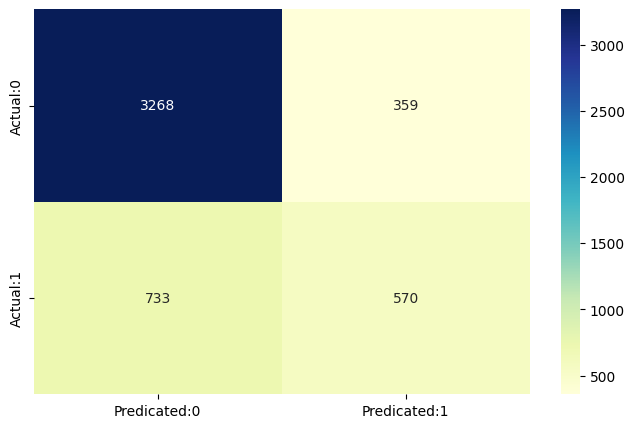

In [185]:
# Create a Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
cm=pd.DataFrame(data=confusion,columns=['Predicated:0','Predicated:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True,fmt='d',cmap="YlGnBu")

In [195]:
# other classification Statistics

FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print(TP,TN,FP,FN)
print("Accuracy", (TP+TN)/float(TP+TN+FP+FN))
print("Sensitivity/Recall/TPR", TP / float(TP+FN))
print("Specificity/TNR", TN / float(TN+FP))
print("FPR - predicting churn when customer does not have churned", FP/ float(TN+FP))
print ("Precision/ Positive predictive value", TP / float(TP+FP))
print ("Negative predictive value",TN / float(TN+ FN))

570 3268 359 733
Accuracy 0.778498985801217
Sensitivity/Recall/TPR 0.43745203376822717
Specificity/TNR 0.9010201268265784
FPR - predicting churn when customer does not have churned 0.09897987317342156
Precision/ Positive predictive value 0.6135629709364908
Negative predictive value 0.8167958010497376
